In [99]:
import json
import locale
import platform

# Declaración de librerías
import numpy

# Configurar el locale en español
if platform.system() == 'Linux':
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
elif platform.system() == 'Windows':
    locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

In [100]:
# Lectura de formatos .json para entrenar cada modelo y asignación
# de información correspondiente
with open('Intenciones_NivelI.json', encoding='utf-8') as file:
    data_NivelI = json.load(file)

with open('Intenciones_NivelIIA.json', encoding='utf-8') as file:
    data_NivelIIA = json.load(file)

with open('Intenciones_NivelIIB.json', encoding='utf-8') as file:
    data_NivelIIB = json.load(file)

In [101]:
# Creación de diccionarios con los nombres de las clases y textos
# presentes en cada uno de los archivos
NI = dict()
NIIA = dict()
NIIB = dict()

for info in data_NivelI['intents']:
    NI.setdefault(info['tag'], info['patterns'])

for info in data_NivelIIA['intents']:
    NIIA.setdefault(info['tag'], info['patterns'])

for info in data_NivelIIB['intents']:
    NIIB.setdefault(info['tag'], info['patterns'])

print(NI)
print(NIIA)
print(NIIB)

{'Reservar_Habitacion': ['Quiero hacer una reserva', 'Quiero reservar una habitación', 'Reservar habitación', 'Me gustaría reservar una habitación', '¿Puedo reservar una habitación?', 'Por favor reserva una habitación', 'Quiero reservar un cuarto', 'Me gustaría reservar un cuarto', 'Por favor reserva un cuarto', '¿Puedo reservar un cuarto?', 'Apartar un cuarto', 'Apartar una habitación'], 'Servicio_hotel': ['Quiero pedir un servicio', 'Quiero solicitar un servicio', 'Necesito solicitar un servicio', 'Quiero pedir un servicio del hotel', 'Necesito un servicio del hotel', 'Me gustaría pedir un servicio', 'Me gustaría solicitar un servicio', 'Quiero pedir servicio al cuarto', 'Me gustaría solicitar servicio al cuarto', 'Quiero pedir servicio a la habitación', 'Quiero apartar un espacio'], 'Historia_Hotel': ['Cuéntame la historia del hotel', 'Háblame del pasado del hotel', '¿Qué historias tiene este hotel?', '¿Qué anécdotas hay del hotel?', 'Me interesa la historia del hotel', '¿Qué hace ú

In [102]:
# Generamos los vectores de respuestas para cada nivel contextual
# (Cada clase tiene una salida numérica asociada)
# (Las salidas empiezan en 0 para cada clase inicial de cada modelo)
Y_NI = list()
Y_NIIA = list()
Y_NIIB = list()

for clase, lista_textos in NI.items():
    for text in lista_textos:
        Y_NI.append(list(NI.keys()).index(clase))

for clase, lista_textos in NIIA.items():
    for text in lista_textos:
        Y_NIIA.append(list(NIIA.keys()).index(clase))

for clase, lista_textos in NIIB.items():
    for text in lista_textos:
        Y_NIIB.append(list(NIIB.keys()).index(clase))

print("Vector de salidas Y para N1:")
print(Y_NI)
print("Vector de salidas Y para N2A:")
print(Y_NIIA)
print("Vector de salidas Y para N2B:")
print(Y_NIIB)

Vector de salidas Y para N1:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Vector de salidas Y para N2A:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Vector de salidas Y para N2B:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [103]:
# Importamos librerías para el filtrado de StopWords y tokenicación
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import re

stop_words = set(stopwords.words('spanish'))

In [104]:
# Para cada enunciado quitamos las StopWords
# También quitamos los acentos y filtramos signos de puntuación
# lo hacemos mediante un metodo
def quitar_stopwords(Textos):
    X = list()
    for sen in Textos:
        sentence = sen
        # Filtrado de stopword
        for stopword in stop_words:
            sentence = sentence.replace(" " + stopword + " ", " ")
        sentence = sentence.replace("á", "a")
        sentence = sentence.replace("é", "e")
        sentence = sentence.replace("í", "i")
        sentence = sentence.replace("ó", "o")
        sentence = sentence.replace("ú", "u")

        # Remover espacios múltiples
        sentence = re.sub(r'\s+', ' ', sentence)
        # Convertir todo a minúsculas
        sentence = sentence.lower()
        # Filtrado de signos de puntuación
        tokenizer = RegexpTokenizer(r'\w+')
        # Tokenización del resultado
        result = tokenizer.tokenize(sentence)
        # Agregar al arreglo los textos "destokenizados" (Como texto nuevamente)
        X.append(TreebankWordDetokenizer().detokenize(result))
    return X

In [105]:
# Obtenemos el vector de entradas (Textos limpios de StopWords)
# para cada uno de los modelos que vamos a generar
Textos_NI = list()
for Lista in NI.values():
    for Texto in Lista:
        Textos_NI.append(Texto)

X_NI = quitar_stopwords(Textos_NI)

Textos_NIIA = list()
for Lista in NIIA.values():
    for Texto in Lista:
        Textos_NIIA.append(Texto)

X_NIIA = quitar_stopwords(Textos_NIIA)

Textos_NIIB = list()
for Lista in NIIB.values():
    for Texto in Lista:
        Textos_NIIB.append(Texto)

X_NIIB = quitar_stopwords(Textos_NIIB)

In [106]:
# Imprimimos la lista de los enunciados que resultan
print(X_NI)
print(X_NIIA)
print(X_NIIB)

['quiero hacer reserva', 'quiero reservar habitacion', 'reservar habitacion', 'me gustaria reservar habitacion', 'puedo reservar habitacion', 'por favor reserva habitacion', 'quiero reservar cuarto', 'me gustaria reservar cuarto', 'por favor reserva cuarto', 'puedo reservar cuarto', 'apartar cuarto', 'apartar habitacion', 'quiero pedir servicio', 'quiero solicitar servicio', 'necesito solicitar servicio', 'quiero pedir servicio hotel', 'necesito servicio hotel', 'me gustaria pedir servicio', 'me gustaria solicitar servicio', 'quiero pedir servicio cuarto', 'me gustaria solicitar servicio cuarto', 'quiero pedir servicio habitacion', 'quiero apartar espacio', 'cuentame historia hotel', 'hablame pasado hotel', 'que historias hotel', 'que anecdotas hotel', 'me interesa historia hotel', 'que hace unico hotel historicamente', 'este hotel parte historia ciudad', 'que pasado hotel largo años', 'este lugar alguna historia especial', 'me encantaria conocer herencia cultural hotel', 'podria relat

In [107]:
# Importamos la librería para generar la matriz de entrada de textos
# (El pad_sequence)
from keras_preprocessing.sequence import pad_sequences

# Cantidad de palabras máximas por ejemplo
# (Las más utilizadas)
maxlen = 5

# Preparamos la capa de embeddingsn(Predefinimos una cantidad de
# 5000 palabras consideradas como tokens
tokenizer_NI = Tokenizer(num_words=5000)
tokenizer_NIIA = Tokenizer(num_words=5000)
tokenizer_NIIB = Tokenizer(num_words=5000)

# Transforma cada texto en una secuencia de valores enteros para cada modelo que haremos
tokenizer_NI.fit_on_texts(X_NI)
X_NI_Tok = tokenizer_NI.texts_to_sequences(X_NI)
tokenizer_NIIA.fit_on_texts(X_NIIA)
X_NIIA_Tok = tokenizer_NIIA.texts_to_sequences(X_NIIA)
tokenizer_NIIB.fit_on_texts(X_NIIB)
X_NIIB_Tok = tokenizer_NIIB.texts_to_sequences(X_NIIB)

# Especificamos la matriz (Con padding hasta maxlen)
X_NI_train = pad_sequences(X_NI_Tok, padding='post', maxlen=maxlen)
X_NIIA_train = pad_sequences(X_NIIA_Tok, padding='post', maxlen=maxlen)
X_NIIB_train = pad_sequences(X_NIIB_Tok, padding='post', maxlen=maxlen)


In [108]:
print("Matriz de entrada para NI:")
print(X_NI_train)

Matriz de entrada para NI:
[[  5  17  18   0   0]
 [  5   6   7   0   0]
 [  6   7   0   0   0]
 [  3   8   6   7   0]
 [ 10   6   7   0   0]
 [ 26  27  18   7   0]
 [  5   6   9   0   0]
 [  3   8   6   9   0]
 [ 26  27  18   9   0]
 [ 10   6   9   0   0]
 [ 19   9   0   0   0]
 [ 19   7   0   0   0]
 [  5  11   4   0   0]
 [  5  16   4   0   0]
 [ 28  16   4   0   0]
 [  5  11   4   1   0]
 [ 28   4   1   0   0]
 [  3   8  11   4   0]
 [  3   8  16   4   0]
 [  5  11   4   9   0]
 [  3   8  16   4   9]
 [  5  11   4   7   0]
 [  5  19  45   0   0]
 [ 29  12   1   0   0]
 [ 46  30   1   0   0]
 [  2  47   1   0   0]
 [  2  48   1   0   0]
 [  3  31  12   1   0]
 [  2  49  50   1  51]
 [ 32   1  52  12  53]
 [  2  30   1  54  55]
 [ 32  56  20  12  57]
 [ 58  33  59  60   1]
 [ 62  21  63  64   1]
 [ 22  65  34  66   1]
 [ 35  20  67  68   1]
 [  3   8  34  69   1]
 [ 21  71  36  72   1]
 [ 22  73  74   1   0]
 [  2  75  76  77   1]
 [ 78  79  36  80   0]
 [ 81  20  12  82   1]
 [  2  

In [109]:
print("Matriz de entrada para NIIA:")
print(X_NIIA_train)

Matriz de entrada para NIIA:
[[41  5 14  0  0]
 [42 43  0  0  0]
 [15 16 17  5 18]
 [19  5 20  0  0]
 [44 45  5 46  0]
 [ 1  5 11 21  0]
 [22 23 47 24  0]
 [25  5 48  0  0]
 [ 1  6 14  0  0]
 [15 16 17  6 18]
 [19  6 20  0  0]
 [ 1  6 11 21  0]
 [22 23 49 24  0]
 [ 1  6 50 51  0]
 [25  6 52  0  0]
 [ 1 53  0  0  0]
 [ 7  4 12  0  0]
 [ 7  4 26 12  0]
 [ 1  4 27  0  0]
 [ 1  4 28  0  0]
 [ 1  4 29  0  0]
 [ 1  4 30  0  0]
 [ 1  4 31  0  0]
 [ 1  4 32  0  0]
 [ 1  4 33  0  0]
 [ 7  3 12  0  0]
 [ 7  3 26 12  0]
 [ 7  3 34 54  0]
 [ 7  3 34 55  0]
 [ 1  3 27  0  0]
 [ 1  3 28  0  0]
 [ 1  3 29  0  0]
 [ 1  3 30  0  0]
 [ 1  3 31  0  0]
 [ 1  3 32  0  0]
 [ 1  3 33  0  0]
 [13 35  0  0  0]
 [13 35  0  0  0]
 [56 13  0  0  0]
 [ 8 36  2  0  0]
 [ 8 37  2  0  0]
 [ 8 38  2  0  0]
 [ 9 10 36  2  0]
 [ 9 10 37  2  0]
 [ 9 10 38  2  0]
 [ 8 11  2  0  0]
 [ 8 39  2  0  0]
 [ 8 40  2  0  0]
 [ 9 10 11  2  0]
 [ 9 10 39  2  0]
 [ 9 10 40  2  0]]


In [110]:
print("Matriz de entrada para NIIB:")
print(X_NIIB_train)

Matriz de entrada para NIIB:
[[ 1  8 12  0  0]
 [ 4  5 18  0  0]
 [13 14  8 19 20]
 [13 14  5 21  0]
 [ 1  5 22  0  0]
 [ 1  5 12  0  0]
 [ 1  8 15  0  0]
 [ 1  5 15  0  0]
 [ 4 23  2  6  0]
 [ 4 24  7  6  0]
 [25 26  2  0  0]
 [16  6 27 28  2]
 [ 4  3 29  0  0]
 [ 4  3 30  0  0]
 [ 4 31 32  0  0]
 [ 1  3 33  0  0]
 [ 1  9 10  7  0]
 [16  6  3 34  2]
 [ 1 17 35 36  7]
 [ 3 10 37  2  0]
 [ 1  9 10 38  0]
 [ 1 17 39  2  0]
 [ 3 11 40  2  0]
 [ 1  9 11  2  0]
 [ 3 11  7  0  0]]


In [111]:
# Declaración de librerías para manejo de arreglos (Numpy)
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings
embeddings_dictionary = dict()
Embeddings_file = open('Word2Vect_Spanish.txt', encoding="utf8")

# Extraemos las características del archivo de embeddings
# y las agregamos a un diccionario (Cada elemento es un vextor)
for linea in Embeddings_file:
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary[palabra] = vector
Embeddings_file.close()

In [112]:
# Asignamos los embeddings correspondientes a cada matriz 
# con la que se entrenarán los modelos por medio de un método
def Asignar_Embeddings(tokenizer, vocab_size):
    # Generamos la matriz de embeddings (Con 300 Características)
    embedding_matrix = zeros((vocab_size, 300))
    for word, index in tokenizer.word_index.items():
        # Extraemos el vector de embedding para cada palabra
        embedding_vector = embeddings_dictionary.get(word)
        # Si la palbra si existía en el vocabulario
        # agregamos su vector de embeddings en la matriz
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
    return embedding_matrix

In [113]:
# Obtenemos las matrices de Embeddings para cada modelo
# Y también el tamaño del vocabulario para cada uno
vocab_size_NI = len(tokenizer_NI.word_index) + 1
embedding_matrix_NI = Asignar_Embeddings(tokenizer_NI, vocab_size_NI)

vocab_size_NIIA = len(tokenizer_NIIA.word_index) + 1
embedding_matrix_NIIA = Asignar_Embeddings(tokenizer_NIIA, vocab_size_NIIA)

vocab_size_NIIB = len(tokenizer_NIIB.word_index) + 1
embedding_matrix_NIIB = Asignar_Embeddings(tokenizer_NIIB, vocab_size_NIIB)

In [114]:
# Declaración de modelo Secuencial que usaremos para todos los casos
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [115]:
# Definición del método para tener la arquitectura de los modelos para cada nivel contextual
def Definir_Modelos(vocab_size, embedding_matrix, X_train, labels):
    # Declaración de las capas del modelo LSTM
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=X_train.shape[1],
                                trainable=False)
    model.add(embedding_layer)
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(labels), activation='softmax'))

    # Compilación del modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    print("\nPalabras en el vocabulario:")
    print(vocab_size)
    return model

In [116]:
# Generamos la arquitectura para el modelo de NI
model_NI = Definir_Modelos(vocab_size_NI, embedding_matrix_NI, X_NI_train, NI.keys())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 5, 300)            35100     
                                                                 
 lstm_6 (LSTM)               (None, 100)               160400    
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 195,904
Trainable params: 160,804
Non-trainable params: 35,100
_________________________________________________________________
None

Palabras en el vocabulario:
117


In [117]:
# Generamos la arquitectura para el modelo de NIIA
model_NIIA = Definir_Modelos(vocab_size_NIIA, embedding_matrix_NIIA, X_NIIA_train, NIIA.keys())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 5, 300)            17100     
                                                                 
 lstm_7 (LSTM)               (None, 100)               160400    
                                                                 
 dense_7 (Dense)             (None, 4)                 404       
                                                                 
Total params: 177,904
Trainable params: 160,804
Non-trainable params: 17,100
_________________________________________________________________
None

Palabras en el vocabulario:
57


In [118]:
# Generamos la arquitectura para el modelo de NIIB
model_NIIB = Definir_Modelos(vocab_size_NIIB, embedding_matrix_NIIB, X_NIIB_train, NIIB.keys())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 5, 300)            12300     
                                                                 
 lstm_8 (LSTM)               (None, 100)               160400    
                                                                 
 dense_8 (Dense)             (None, 3)                 303       
                                                                 
Total params: 173,003
Trainable params: 160,703
Non-trainable params: 12,300
_________________________________________________________________
None

Palabras en el vocabulario:
41


In [119]:
# Declaramos el método para entrenar cada modelo
from keras.utils.np_utils import to_categorical


def Entrenar_Modelos(X_train, Y, model, labels):
    # Declaramos librería para convertir la salida en un vector 
    # de X elementos con activación en la columna correspondiente
    # a su categoría
    train_labels = to_categorical(Y, num_classes=len(labels))
    print('Matriz de salidas')
    print(train_labels)

    # Ajuste de los datos de entrenamiento al modelo creado
    history = model.fit(X_train, train_labels, epochs=30, batch_size=1, verbose=1)

    # Cálculo de los procentajes de Eficiencia y pérdida 
    score = model.evaluate(X_train, train_labels, verbose=1)
    print("\nTest Loss:", score[0])
    print("Test Accuracy:", score[1])
    return history

In [120]:
# Entrenamos el modelo del nivel NI y obtenemos el historial de las épocas para realizar su gráfica
history_NI = Entrenar_Modelos(X_NI_train, Y_NI, model_NI, NI.keys())

Matriz de salidas
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Epoch 1/30
62/62 [==============================] -

In [121]:
# Entrenamos el modelo del nivel NIIA y obtenemos el historial de las épocas para realizar su gráfica
history_NIIA = Entrenar_Modelos(X_NIIA_train, Y_NIIA, model_NIIA, NIIA.keys())

Matriz de salidas
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Epoch 1/30
51/51 [==============================] - 2s 7ms/step - loss: 1.3084 - accuracy: 0.5882
Epoch 2/30
51/51 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.7647
Epoch 3/30
51/51 [==

In [122]:
# Entrenamos el modelo del nivel NIIB y obtenemos el historial de las épocas para realizar su gráfica
history_NIIB = Entrenar_Modelos(X_NIIB_train, Y_NIIB, model_NIIB, NIIB.keys())

Matriz de salidas
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Epoch 1/30
25/25 [==============================] - 2s 7ms/step - loss: 1.0856 - accuracy: 0.4000
Epoch 2/30
25/25 [==============================] - 0s 7ms/step - loss: 0.9403 - accuracy: 0.7600
Epoch 3/30
25/25 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.7600
Epoch 4/30
25/25 [==============================] - 0s 7ms/step - loss: 0.2848 - accuracy: 0.9200
Epoch 5/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0620 - accuracy: 1.0000
Epoch 6/30
25/25 [==============================] - 0s 7ms/step - loss: 0.1929 - accuracy: 0.9200
Epoch 7/30
25/25 [==============================] - 0s 7ms/step - loss: 0.2131 - accuracy: 0.

In [123]:
# Método para hacer la gráfica de cada modelo
# época a época para ver su evolución
import matplotlib.pyplot as plt


def Grafica_Modelo(history):
    # Parámetros de ploteo para la gráfica
    plt.figure(figsize=(12, 5))
    plt.ylim(-0.1, 1.1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Acc', 'Loss'])
    plt.show()

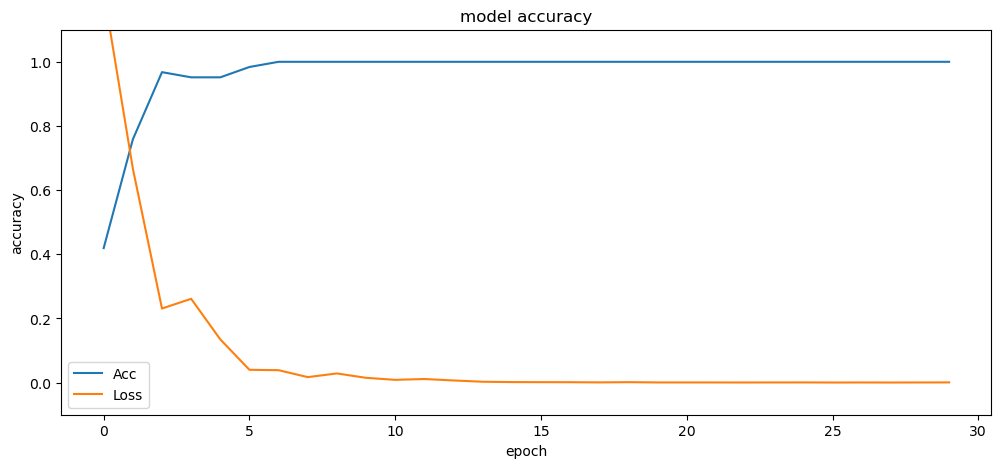

In [124]:
# Graficar el modelo NI
Grafica_Modelo(history_NI)

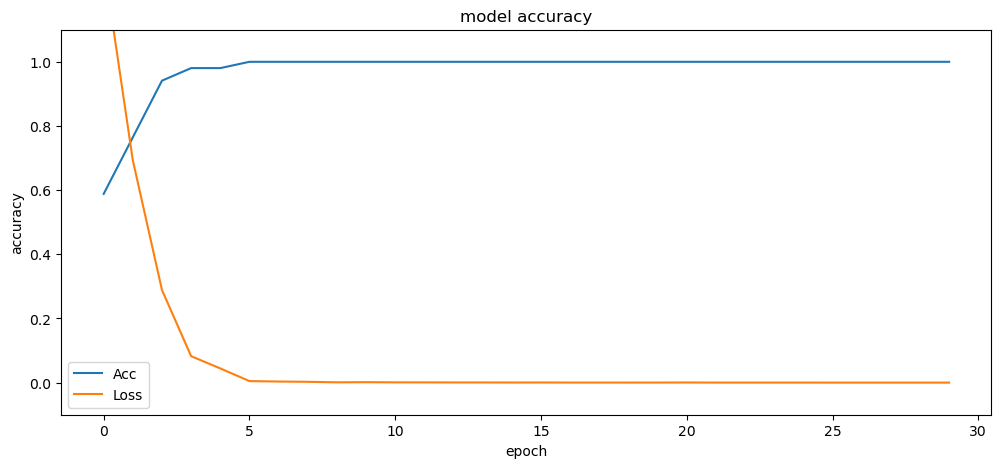

In [125]:
# Graficar el modelo NIIA
Grafica_Modelo(history_NIIA)

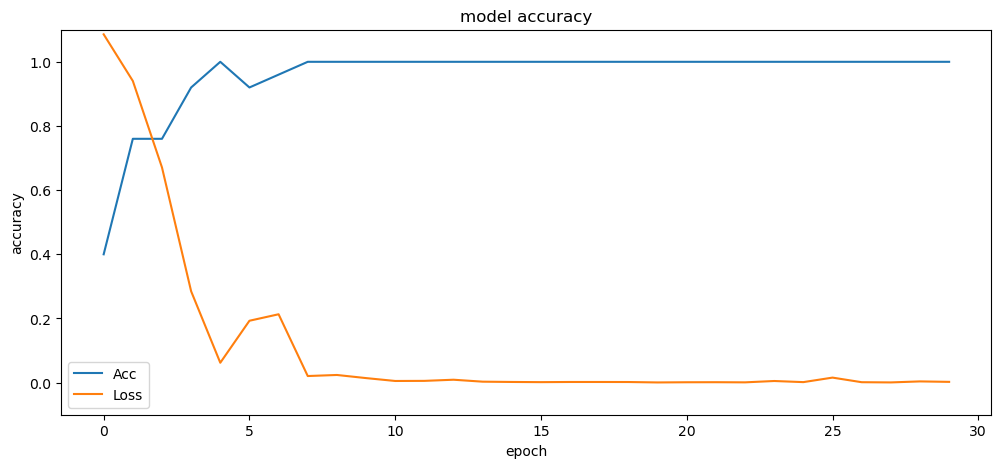

In [126]:
# Graficar el modelo NIIB
Grafica_Modelo(history_NIIB)

# Programación del Árbol conversacional

In [127]:
# El árbol conversacional debe de estar en un estado específico
# iniciar en el nivel contextual 1, e ir avanzando conforme a
# las decisiones que toma el usuario, como si fuera una máquina 
# de estados

def instancer(inp, model, tags):
    inp = inp.lower().replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o")
    inp = inp.replace("ú", "u").replace("¿", "").replace("?", "")
    txt = [inp]
    seq = tokenizer_NI.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=maxlen)

    # Add these print statements to debug
    # print("Input shape before predict:", padded.shape)
    # print("Input data:", padded)

    results = model.predict(padded)
    results_index = numpy.argmax(results)
    tag = list(tags.keys())[results_index]
    maxscore = numpy.max(results)
    return tag, maxscore


In [128]:

def Activar_NI(user_input):
    # Simula la pregunta inicial cuando se ingresa en el nivel contextual NI
    response = "ChatBot: ¿En qué puedo ayudarte?"

    # Evaluamos la entrada del usuario en lugar de esperar una entrada en un bucle
    tag, maxscore = instancer(user_input, model_NI, NI)

    # Maneja la lógica de decisión basada en la entrada del usuario y el puntaje del modelo
    if maxscore > 0.65 or user_input == 'salir':
        if user_input == 'salir':
            response = "ChatBot: Hasta luego, fue un gusto hablar contigo"
            return response, 'salir'

        if tag == 'Reservar_Habitacion':
            if user_input.count('Tipo_Habitacion') > 0:
                next_state = 'NIIA1'
            elif user_input.count('Fecha_entrada') > 0:
                next_state = 'NIIA2'
            elif user_input.count('Fecha_salida') > 0:
                next_state = 'NIIA3'
            elif user_input.count("Num_huespedes") > 0:
                next_state = 'NIIA4'
            else:
                next_state = 'NIIA'
            response = "ChatBot: Entendido, estás interesado en reservar una habitación."

        elif tag == 'Servicio_hotel':
            if user_input.count('Apartar_espacio') > 0:
                next_state = 'NIIB1'
            elif user_input.count('Servicio') > 0:
                next_state = 'NIIB2'
            elif user_input.count('Comida_bebida') > 0:
                next_state = 'NIIB3'
            else:
                next_state = 'NIIB'
            response = "ChatBot: Claro, puedo ayudarte con los servicios del hotel."

        elif tag == 'Historia_Hotel':
            response = "ChatBot: Desde su apertura en 1920 por el pionero Don Eduardo Mendoza, nuestro hotel es un ícono de la arquitectura Art Deco, diseñado por Carlos Fontana.\nHa acogido a luminarias como la actriz Clara Estrella en los años 30 y fue el lugar de la histórica cumbre de paz en 1955. Cada habitación cuenta una historia; por ejemplo, la suite 204, donde el novelista Luis Montero escribió su obra maestra. Es un lugar donde la historia y la hospitalidad se encuentran en cada esquina."
            next_state = 'NI'

        elif tag == 'Atracciones_Cercanas':
            response = "Chatbot: En el corazón de la ciudad, nuestro hotel se encuentra a un corto trayecto del Parque Central y a unos minutos del Museo Nacional de Arte, perfecto para los entusiastas de la cultura. Para aquellos interesados en la historia, el Convento de San Francisco está a una caminata de distancia. No te pierdas el Mercado del Sol, ideal para saborear la cocina local y encontrar artesanías únicas. Además, ofrecemos excursiones al Castillo de San Lorenzo, un sitio histórico con vistas espectaculares, a solo media hora en coche."
            next_state = 'NI'

        else:
            # Si el tag no coincide con ningún caso conocido, maneja el estado por defecto
            next_state = 'NI'
            response = "ChatBot: Puedes preguntarme sobre reservaciones, servicios del hotel, su historia o atracciones cercanas."

        return response, next_state

    else:
        # Si la confianza del modelo es baja, pide al usuario que reformule la pregunta
        response = "ChatBot: Lo siento, pero no entendí tu petición, ¿Podrías decirlo de otra forma?"
        return response, 'NI'  # El estado se mantiene igual


In [129]:
def Activar_NIIA(user_input):
    # Simula la pregunta inicial cuando se ingresa en el nivel contextual NIIA
    response = "ChatBot: Entiendo que quieres reservar una habitación, por favor repite 'Reservar Habitación' para iniciar el proceso."

    # Evaluamos la entrada del usuario en lugar de esperar una entrada en un bucle
    tag, maxscore = instancer(user_input, model_NIIA, NIIA)

    # Maneja la lógica de decisión basada en la entrada del usuario y el puntaje del modelo
    if maxscore > 0.5 or user_input == 'salir' or user_input == 'volver':
        if user_input == 'volver':
            next_state = 'NI'
            response = "ChatBot: Entendido, volviendo al menú principal."
        elif user_input == 'salir':
            response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
            return response

        # Asignar el siguiente estado basado en la etiqueta de intención o los datos faltantes
        elif tag == 'Tipo_Habitacion' or not Tipo_Cuarto:
            next_state = 'NIIA1'
        elif tag == 'Fecha_entrada':
            next_state = 'NIIA2'
        elif tag == 'Fecha_salida':
            next_state = 'NIIA3'
        elif tag == 'Num_huespedes':
            next_state = 'NIIA4'
        else:
            # Si el tag no coincide con ningún caso conocido, maneja el estado por defecto
            next_state = 'NIIA'
            response = "ChatBot: Por favor, dime más sobre tu reserva."

        return response, next_state
    else:
        # Si la confianza del modelo es baja, pide al usuario que reformule la pregunta
        response = "ChatBot: Lo siento, pero no entendí. Puedes decirme 'Reservar Habitación' por ejemplo."
        return response, 'NIIA'


In [130]:
def Activar_NIIA1(user_input):
    # Aquí, user_input es la entrada del usuario y Tipo_Cuarto mantiene el estado de esta variable específica.
    next_state = "NIIA1"
    # Comenzamos con la respuesta inicial del chatbot
    response = "ChatBot: Excelente! Reservemos una habitación. ¿Qué tipo de habitación te gustaría reservar?"

    # Convertimos la entrada del usuario a minúsculas para una comparación uniforme
    user_input = user_input.lower()

    # Comprobamos las condiciones del input y actualizamos el estado y la respuesta correspondientemente
    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    elif 'estándar' in user_input or 'económica' in user_input:
        response = "ChatBot: Excelente, reservaremos una habitación estándar."
        Tipo_Cuarto = "Estándar"
        next_state = 'NIIA2'
    elif 'suite' in user_input:
        response = "ChatBot: Excelente, reservaremos una habitación suite."
        Tipo_Cuarto = "Suite"
        next_state = 'NIIA2'
    elif 'doble' in user_input or 'dos camas' in user_input:
        response = "ChatBot: Excelente, reservaremos una habitación doble."
        Tipo_Cuarto = "Doble"
        next_state = 'NIIA2'
    elif 'familiar' in user_input:
        response = "ChatBot: Excelente, reservaremos una habitación familiar."
        Tipo_Cuarto = "Familiar"
        next_state = 'NIIA2'
    elif 'deluxe' in user_input:
        response = "ChatBot: Excelente, reservaremos una habitación deluxe."
        Tipo_Cuarto = "Deluxe"
        next_state = 'NIIA2'
    elif 'ofrecen' in user_input:
        response = "ChatBot: Ofrecemos los siguientes tipos de habitaciones: estándar, doble, familiar, suite, y deluxe."
        # Aquí no actualizamos Tipo_Cuarto ni next_state porque el usuario está pidiendo información
    else:
        response = "ChatBot: ¿Podrías repetirme qué tipo de habitación te gustaría reservar?"
        next_state = 'NIIA1'  # Mantenemos el estado para pedir de nuevo la información

    return response, next_state


In [131]:



def Activar_NIIA2(user_input):
    response = "ChatBot: Muy bien! ¿Para cuándo agendamos su entrada? (dd/mm/aaaa)"

    user_input = user_input.lower()

    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    else:
        # Intenta convertir la entrada en una fecha
        try:
            # Asume que la entrada está en formato dd/mm/aaaa
            fecha_entrada_usuario = datetime.strptime(user_input, '%d/%m/%Y')
            # Comprueba que la fecha no sea pasada
            if fecha_entrada_usuario.date() < datetime.now().date():
                response = "ChatBot: No puedes agendar una fecha en el pasado. Por favor, elige una fecha futura."
                next_state = 'NIIA2'  # Mantenemos el estado para pedir de nuevo la fecha
            else:
                fecha_formateada = fecha_entrada_usuario.strftime('%d de %B del %Y')
                response = f"ChatBot: Muy bien, agendaré la entrada para el {fecha_formateada}."
                Fecha_entrada = fecha_entrada_usuario  # Actualizamos la fecha de entrada
                next_state = 'NIIA3'
        except ValueError:
            # Si hay un error en la conversión, indica que el formato no es correcto
            response = "ChatBot: Parece que la fecha no está en el formato correcto. Por favor, ingresa la fecha en formato dd/mm/aaaa."
            next_state = 'NIIA2'  # Mantenemos el estado para pedir de nuevo la fecha

    return response, next_state


In [132]:
from datetime import datetime


def Activar_NIIA3(user_input):
    response = "ChatBot: Muy bien! ¿Para cuándo agendamos su salida? (dd/mm/aaaa)"

    user_input = user_input.lower()

    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    else:
        # Intenta convertir la entrada en una fecha
        try:
            # Asume que la entrada está en formato dd/mm/aaaa
            fecha_salida_usuario = datetime.strptime(user_input, '%d/%m/%Y')
            # Comprueba que la fecha no sea pasada y que sea después de la fecha de entrada
            if fecha_salida_usuario.date() < datetime.now().date():
                response = "ChatBot: No puedes agendar una fecha de salida en el pasado. Por favor, elige una fecha futura."
                next_state = 'NIIA3'  # Mantenemos el estado para pedir de nuevo la fecha
            elif Fecha_entrada and fecha_salida_usuario.date() <= Fecha_entrada.date():
                response = "ChatBot: La fecha de salida debe ser posterior a la fecha de entrada. Por favor, elige una fecha adecuada."
                next_state = 'NIIA3'  # Mantenemos el estado para pedir de nuevo la fecha
            else:
                fecha_formateada = fecha_salida_usuario.strftime('%d de %B del %Y')
                response = f"ChatBot: Muy bien, agendaré la salida para el {fecha_formateada}."
                Fecha_salida = fecha_salida_usuario  # Actualizamos la fecha de salida
                next_state = 'NIIA4'
        except ValueError:
            # Si hay un error en la conversión, indica que el formato no es correcto
            response = "ChatBot: Parece que la fecha no está en el formato correcto. Por favor, ingresa la fecha en formato dd/mm/aaaa."
            next_state = 'NIIA3'  # Mantenemos el estado para pedir de nuevo la fecha

    return response, next_state


In [133]:
def Activar_NIIA4(user_input):
    response = "ChatBot: Súper! ¿Para cuántas personas es la reservación?"

    user_input = user_input.lower()

    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    else:
        try:
            # Intenta convertir la entrada en un número de personas
            huespedes = int(user_input)
            if 1 <= huespedes <= 4:
                response = f"ChatBot: Muy bien, agendaré para {huespedes} personas.\n" \
                           f"La reservación final es de {huespedes} personas con el tipo de cuarto {Tipo_Cuarto}, " \
                           f"con fecha de entrada {Fecha_entrada.strftime('%d/%m/%Y')}, " \
                           f"y fecha de salida {Fecha_salida.strftime('%d/%m/%Y')}. " \
                           f"\n\nSi deseas algo más no dudes en preguntar."
                Num_huespedes = huespedes
                next_state = 'NI'  # Podría ser 'finalizar' si este es el último paso
            else:
                response = "ChatBot: Actualmente solo podemos reservar para hasta 4 personas."
                next_state = 'NIIA4'
        except ValueError:
            # Si la entrada no es un número, pedimos al usuario que intente de nuevo
            response = "ChatBot: ¿Podrías indicarme un número de personas para la reservación?"
            next_state = 'NIIA4'

    return response, next_state


In [134]:
def Activar_NIIB(user_input):
    response = "ChatBot: Entiendo que quieres pedir un servicio del Hotel. " \
               "(Apartar espacio, Pedir servicio al cuarto, Pedir comida o bebida)"

    # Asumiendo que 'instancer' es una función que procesa la entrada y devuelve un tag y un puntaje.
    tag, maxscore = instancer(user_input, model_NIIB, NIIB)

    # Por ahora, simplemente imprimiré el resumen del modelo para fines de depuración.
    # Debes considerar cómo manejar esto en la interfaz de usuario.
    model_summary = str(model_NIIB.summary())  # Esto es solo un ejemplo

    if maxscore > 0.5 or user_input == 'salir' or user_input == 'volver':
        if user_input == 'volver':
            next_state = 'NI'
            response = "ChatBot: De acuerdo, volviendo al menú anterior."
        elif user_input == 'salir':
            response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
            next_state = 'salir'
        elif tag == 'Apartar_espacio':
            next_state = 'NIIB1'
        elif tag == 'Servicio':
            next_state = 'NIIB2'
        elif tag == 'Comida_bebida':
            next_state = 'NIIB3'
        else:
            next_state = 'unknown'  # Para manejar cualquier otra etiqueta que pueda aparecer
    else:
        response = "ChatBot: Lo siento, pero no entendí. Puedes decirme \"Apartar espacio\" por ejemplo."
        next_state = 'NIIB'

    return response, next_state


In [135]:
def Activar_NIIB1(user_input):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIB1
    response = "ChatBot: Excelente! Apartemos un espacio. ¿Qué tipo de espacio te gustaría reservar?"

    user_input = user_input.lower()

    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    elif 'alberca' in user_input:
        response = "ChatBot: Excelente, reservaremos la alberca. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Espacio_Apartado = "alberca"
        next_state = 'NI'  # Suponiendo que 'NI' es el estado al que debe volver después de reservar
    elif 'gimnasio' in user_input:
        response = "ChatBot: Excelente, reservaremos el gimnasio. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Espacio_Apartado = "gimnasio"
        next_state = 'NI'
    elif 'eventos' in user_input or 'salon' in user_input:
        response = "ChatBot: Excelente, reservaremos el salón de eventos. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Espacio_Apartado = "salón de eventos"
        next_state = 'NI'
    elif 'terraza' in user_input:
        response = "ChatBot: Excelente, reservaremos la terraza. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Espacio_Apartado = "terraza"
        next_state = 'NI'
    elif 'spa' in user_input:
        response = "ChatBot: Excelente, reservaremos el spa. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Espacio_Apartado = "spa"
        next_state = 'NI'
    else:
        response = "ChatBot: ¿Podrías repetirme qué tipo de espacio te gustaría reservar?"
        next_state = 'NIIB1'

    return response, next_state


In [136]:
def Activar_NIIB2(user_input):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIB2
    response = "ChatBot: Con gusto! ¿Qué servicio le gustaría pedir?"

    user_input = user_input.lower()

    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    elif 'limpiar' in user_input:
        response = "ChatBot: Claro, enviaremos a alguien para limpiar la habitación. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Servicio_Pedido = "limpieza de cuarto"
        next_state = 'NI'
    elif 'toallas' in user_input:
        response = "ChatBot: Ok, enviaremos toallas a su habitación. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Servicio_Pedido = "toallas"
        next_state = 'NI'
    elif 'jabón' in user_input or 'shampoo' in user_input:
        response = "ChatBot: Seguro! enviaremos artículos de higiene personal a su cuarto. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Servicio_Pedido = "higiene personal"
        next_state = 'NI'
    elif 'equipaje' in user_input:
        response = "ChatBot: Mandaremos a alguien para apoyar con el equipaje. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Servicio_Pedido = "apoyo con equipaje"
        next_state = 'NI'
    elif 'almohadas' in user_input:
        response = "ChatBot: Con gusto enviaremos más almohadas a la habitación. Si hay otro servicio que te gustaría pedir no dudes en decírmelo!"
        Servicio_Pedido = "almohadas"
        next_state = 'NI'
    else:
        response = "ChatBot: ¿Podrías repetirme qué servicio requieres?"
        next_state = 'NIIB2'

    return response, next_state


In [137]:
def Activar_NIIB3(user_input):
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIB3
    response = "ChatBot: Hora de comer! ¿Qué alimento o bebida le gustaría pedir?"

    user_input = user_input.lower()

    if user_input == 'volver':
        next_state = 'NI'
        response = "ChatBot: De acuerdo, volviendo al menú anterior."
    elif user_input == 'salir':
        response = "ChatBot: Hasta luego, fue un gusto hablar contigo."
        next_state = 'salir'
    elif 'desayuno' in user_input:
        response = "ChatBot: Claro, enviaremos el desayuno a la habitación."
        comida_pedida = "desayuno"
        next_state = 'NI'
    elif 'vegana' in user_input or 'vegetariana' in user_input:
        response = "ChatBot: Por supuesto, prepararemos una opción vegana/vegetariana para usted."
        comida_pedida = "vegana/vegetariana"
        next_state = 'NI'
    elif 'comida' in user_input:
        response = "ChatBot: Mandaremos la comida a la habitación."
        comida_pedida = "comida"
        next_state = 'NI'
    elif 'botella' in user_input or 'vino' in user_input:
        response = "ChatBot: Seguro! enviaremos una botella de vino."
        comida_pedida = "vino"
        next_state = 'NI'
    elif 'café' in user_input:
        response = "ChatBot: Con gusto enviaremos café a su habitación."
        comida_pedida = "café"
        next_state = 'NI'
    elif 'romántica' in user_input:
        response = "ChatBot: Prepararemos una cena romántica para usted."
        comida_pedida = "romántica"
        next_state = 'NI'
    elif 'cena' in user_input:
        response = "ChatBot: Claro, mandaremos la cena a la habitación."
        comida_pedida = "cena"
        next_state = 'NI'
    else:
        response = "ChatBot: ¿Podrías repetirme qué alimento/bebida quieres pedir?"
        next_state = 'NIIB3'

    return response, next_state


In [138]:
# Implementación de casos correspondientes para cada nivel del ChatBot
# Nivel contextual inicial por defecto, el primero
estado_actual: 'NI'
Tipo_Cuarto: ""
Fecha_entrada: ""
Fecha_salida: ""
Num_huespedes: 0
Servicio_deseado: ""
Espacio_Apartado: ""
Servicio_Pedido: ""
Comida_Pedida: ""

maquina_estados = {'NI': Activar_NI,
                   "NIIA": Activar_NIIA,
                   "NIIA1": Activar_NIIA1,
                   "NIIA2": Activar_NIIA2,
                   "NIIA3": Activar_NIIA3,
                   "NIIA4": Activar_NIIA4,
                   "NIIB": Activar_NIIB,
                   "NIIB1": Activar_NIIB1,
                   "NIIB2": Activar_NIIB2,
                   "NIIB3": Activar_NIIB3
                   }

# Esta es tu función adaptada que llama a la función correcta basada en el estado actual
def adapted_chat1(user_input, Nivel):
    # Llama a la función de estado correspondiente y obtén el siguiente nivel y la respuesta
    response, next_state = maquina_estados[Nivel](user_input)

    # Devuelve tanto la respuesta como el siguiente estado para que Gradio los maneje
    return response, next_state



import gradio as gr


# Define una función de envoltura para interactuar con Gradio
def gradio_chatbot_function(user_input, state='NI'):
    response, next_state = adapted_chat1(user_input, state)
    return response, next_state


# Crea la interfaz de Gradio con memoria para mantener el estado
iface = gr.Interface(
    fn=gradio_chatbot_function,
    inputs=["text", "state"],  # 'text' es la entrada del usuario y 'state' es el estado actual del chatbot
    outputs=["text", "state"],  # Devuelve la respuesta y el siguiente estado
    title="ESDAI's Hotel Chatbot",
    description="Bienvenido a ESDAI's Hotel Chatbot. ¿Qué deseas hacer?."
)

# Lanzar la interfaz
iface.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [139]:
# # Check the size of the tokenizer's word index
# print("Tokenizer word index size:", len(tokenizer_NI.word_index))
# 
# # After loading the model, check the input dimension of the embedding layer
# embedding_input_dim = model_NIIB.layers[0].get_config()['input_dim']
# print("Model's embedding input dimension:", embedding_input_dim)
